In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_importance
from lightgbm import LGBMClassifier
import xgboost as xgb
from lightgbm import plot_importance
from lightgbm import plot_importance

import scipy.stats as stats 
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import qqplot, add_constant
from statsmodels.api import Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportions_ztest

from subprocess import call
from IPython.display import Image
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from yellowbrick.cluster import SilhouetteVisualizer

import graphviz
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.over_sampling import SMOTE

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc('font', family = 'NanumBarunGothic')
matplotlib.rc('axes', unicode_minus = False)

In [2]:
def get_shift(hour):
    if 6 <= hour < 14:
        return "1교대"
    elif 14 <= hour < 22:
        return "2교대"
    else:
        return "3교대"

In [3]:
df = pd.read_csv("/home/piai/다운로드/01_실습파일/2. Big Data 분석/SCALE불량.csv", encoding = 'euc-kr')
df.shape

(1000, 21)

In [4]:
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


In [5]:
df.describe()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,26.78200,2831.900000,36788.200000,1157.245000,85.972000,1150.928000,71.720000,238.589000,934.637000,8.557000
std,18.13757,494.081478,13912.387116,21.245007,26.346297,17.344384,20.602137,38.194828,96.598015,1.604158
min,12.00000,1800.000000,7900.000000,1103.000000,55.000000,1113.000000,35.000000,165.000000,0.000000,5.000000
25%,15.00000,2500.000000,26650.000000,1140.000000,66.000000,1135.750000,57.750000,210.000000,893.750000,8.000000
50%,19.00000,2800.000000,40400.000000,1159.000000,75.000000,1156.000000,66.000000,230.000000,948.000000,9.000000
75%,34.00000,3100.000000,49100.000000,1173.000000,102.250000,1164.000000,81.000000,263.000000,991.000000,10.000000
max,100.00000,4600.000000,54900.000000,1206.000000,158.000000,1185.000000,145.000000,362.000000,1078.000000,10.000000


In [6]:
df.describe(include = 'object')

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,hsb,fur_no,fur_input_row,rolling_method,work_group
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,1000,2,66,7,2,2,3,2,2,4
top,PLT_1001,03JAN2023:07:07:53,양품,JS-SM490YB,영국,C,적용,3호기,1열,CR(제어압연),2조
freq,1,1,690,84,256,755,953,342,508,840,292


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  rolling_method   1000 non-null   o

In [8]:
df['timestamp'] = pd.to_datetime(df['rolling_date'], format='%d%b%Y:%H:%M:%S')
df['day'] = df['rolling_date'].str[0:2]
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'] >= 5
df['day_of_week'] = df['day_of_week'].astype(str)
df['is_weekend'] = df['is_weekend'].astype(str)

In [9]:
df_y = df['scale']
df_x = df.drop(columns=['scale'])

In [10]:
# 기존 데이터 처리 코드
df_x.drop(labels=['plate_no', 'spec_long', 'rolling_date', 'timestamp'], axis=1, inplace=True)

# 조건에 따라 df_x에서 데이터를 삭제
df_x = df_x[df_x['rolling_temp'] != 0]

# 조건에 따라 df_y에서 동일한 인덱스의 데이터 삭제
df_y = df_y[df_x.index]

# 피처 변환
df_x['shift'] = df_x['hour'].apply(get_shift)
df_x.drop(labels=['hour'], axis=1, inplace=True)
df_y_original = df_y.replace({'양품': 0, '불량': 1})

# 연속형 피처와 범주형 피처를 분리
continuous_features = df_x.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_x.select_dtypes(include=['object']).columns

# df_x_original에 대해 원-핫 인코딩을 drop_first=False로 적용
df_x_original = df_x.copy()
df_encoded_original = pd.get_dummies(df_x_original[categorical_features], drop_first=False)
df_x_original = pd.concat([df_x_original[continuous_features], df_encoded_original], axis=1)

# df_x_scaled에 대해 표준화 및 원-핫 인코딩을 drop_first=True로 적용
df_x_scaled = df_x.copy()
# 연속형 피처를 표준화
scaler = StandardScaler()
df_x_scaled[continuous_features] = scaler.fit_transform(df_x_scaled[continuous_features])
# 범주형 피처에 대해 원-핫 인코딩을 drop_first=True로 적용
df_encoded_scaled = pd.get_dummies(df_x_scaled[categorical_features], drop_first=True)
df_x_scaled = pd.concat([df_x_scaled[continuous_features], df_encoded_scaled], axis=1)

# 결과 확인
print("df_x_original:")
print(df_x_original.head())

print("df_x_scaled:")
print(df_x_scaled.head())

df_x_original:
   pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  fur_soak_temp  \
0        32      3700      15100           1144            116           1133   
1        32      3700      15100           1144            122           1135   
2        33      3600      19200           1129            116           1121   
3        33      3600      19200           1152            125           1127   
4        38      3100      13300           1140            134           1128   

   fur_soak_time  fur_total_time  rolling_temp  descaling_count  ...  \
0             59             259           934                8  ...   
1             53             238           937                8  ...   
2             55             258           889                8  ...   
3             68             266           885                8  ...   
4             48             246           873                8  ...   

   day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  da

> 로지스틱회귀의 경우 Logit Regression Results 결과를 봤을때 다중공선성의 문제로 일부 피처가 nan 혹은 inf값으로 출력됩니다, 그 값들을 제거하고 정상적인 모델을 출력해서 유의계수가 가장 높은 값들을 차례로 제거하는 후진제거법을 이용해 최종 회귀모델을 도출하였습니다.성능이 만족스럽게 나오진 않았기에 최종모델에서 제외하였습니다.

In [11]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_x_scaled, df_y_original, test_size=0.3, random_state=42)

# 피처 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일된 데이터프레임으로 변환
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# 상수항 추가
X_train_scaled_sm = sm.add_constant(X_train_scaled_df)
X_test_scaled_sm = sm.add_constant(X_test_scaled_df)

# 종속 변수와 독립 변수의 인덱스 확인 및 일치시키기
y_train = y_train.reset_index(drop=True)
X_train_scaled_sm = X_train_scaled_sm.reset_index(drop=True)

# 모델 생성 및 훈련
model = sm.Logit(y_train, X_train_scaled_sm)

# 모델 훈련
try:
    result = model.fit(maxiter=100)  # 반복 횟수 증가
except Exception as e:
    print(f"모델 훈련 중 오류 발생: {e}")

# NaN 값을 가진 피처 제거
nan_columns = result.summary2().tables[1][result.summary2().tables[1]['P>|z|'].isna()].index
X_train_scaled_sm = X_train_scaled_sm.drop(columns=nan_columns, errors='ignore')
X_test_scaled_sm = X_test_scaled_sm.drop(columns=nan_columns, errors='ignore')

# 개선 전 모델 요약 출력
print("모델 개선 전 요약:")
print(result.summary())

# VIF 계산 함수
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# VIF 계산 및 필터링
def filter_high_vif_features(data, threshold=10):
    vif_df = calculate_vif(data)
    print("VIF values before filtering:")
    print(vif_df.sort_values(by="VIF", ascending=True))
    
    high_vif_features = vif_df[vif_df["VIF"] > threshold]["feature"].tolist()
    return high_vif_features, vif_df

# VIF 10 이상인 피처 제거
high_vif_features, vif_df = filter_high_vif_features(X_train_scaled_sm, threshold=10)
X_train_filtered = X_train_scaled_sm.drop(columns=high_vif_features, errors='ignore')
X_test_filtered = X_test_scaled_sm.drop(columns=high_vif_features, errors='ignore')

# 개선 후 모델 재훈련
model = sm.Logit(y_train, X_train_filtered)
result_filtered = model.fit(maxiter=100)  # 반복 횟수 증가

# 개선 후 모델 요약 출력
print("모델 개선 후 요약:")
print(result_filtered.summary())

# 유의미한 피처 선택 및 제거 함수
def remove_non_significant_features(X_train_data, X_test_data, y_train_data, result, alpha=0.05):
    p_values = result.pvalues
    features = p_values.index
    while p_values.max() > alpha:
        # 가장 큰 p-value를 가진 피처 찾기
        worst_feature = p_values.idxmax()
        print(f"Removing feature: {worst_feature} with p-value: {p_values.max()}")
        
        # 피처 제거
        X_train_reduced = X_train_data.drop(columns=[worst_feature], errors='ignore')
        X_test_reduced = X_test_data.drop(columns=[worst_feature], errors='ignore')
        
        # 모델 재훈련
        model_reduced = sm.Logit(y_train_data, X_train_reduced)
        result_reduced = model_reduced.fit(maxiter=100)
        
        # p-values 업데이트
        p_values = result_reduced.pvalues
        X_train_data = X_train_reduced
        X_test_data = X_test_reduced
    
    return X_train_data, X_test_data, result_reduced

# 유의미한 피처만 남기기
X_train_final, X_test_final, result_final = remove_non_significant_features(X_train_filtered, X_test_filtered, y_train, result_filtered, alpha=0.05)

# 최종 모델 요약 출력
print("최종 모델 요약:")
print(result_final.summary())

# 최종 모델 VIF 계산
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

final_vif_df = calculate_vif(X_train_final)
print("Final VIF values:")
print(final_vif_df.sort_values(by="VIF", ascending=True))

# 예측
y_pred_prob = result_final.predict(X_test_final)
y_pred = (y_pred_prob >= 0.5).astype(int)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

         Current function value: 0.255705
         Iterations: 100
모델 개선 전 요약:
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      660
Method:                           MLE   Df Model:                           34
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.5874
Time:                        21:09:55   Log-Likelihood:                -177.72
converged:                      False   LL-Null:                       -430.71
Covariance Type:            nonrobust   LLR p-value:                 1.912e-85
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.9093   2.66e+04  -3.42e-05      1.000    -5.2e+04     5.2e+04
pt_thic

Optimization terminated successfully.
         Current function value: 0.287642
         Iterations 9
Removing feature: pt_length with p-value: 0.23581555084343075
Optimization terminated successfully.
         Current function value: 0.288651
         Iterations 9
Removing feature: day_of_week_1 with p-value: 0.1986758767731286
Optimization terminated successfully.
         Current function value: 0.289897
         Iterations 9
Removing feature: spec_country_한국 with p-value: 0.16747234842960035
Optimization terminated successfully.
         Current function value: 0.291291
         Iterations 9
Removing feature: fur_no_2호기 with p-value: 0.16260249764607748
Optimization terminated successfully.
         Current function value: 0.292715
         Iterations 9
Removing feature: pt_thick with p-value: 0.14103646102557432
Optimization terminated successfully.
         Current function value: 0.294238
         Iterations 9
최종 모델 요약:
                           Logit Regression Results        

In [12]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'C': [0.1, 1, 10, 100, 1000],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto'],  # gamma가 사용되지 않는 경우 (예: linear 커널), 'auto'와 'scale'은 같은 역할을 함
#     'degree': [3, 4, 5]  # degree는 polynomial 커널에서만 사용됨
# }

# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# print(grid_search.best_params_)

In [13]:
# # 예제 데이터 생성 (2차원 데이터 사용)
# X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# # SVM 모델 훈련
# svm_clf = SVC(C=10, degree=3, gamma='auto', kernel='rbf', random_state=42)
# svm_clf.fit(X, y)

# # 예측
# y_pred = svm_clf.predict(X)

# # 오분류된 데이터 포인트 식별
# incorrect_preds = X[y != y_pred]
# incorrect_preds_labels = y[y != y_pred]

# # 결정 경계 시각화
# plt.figure(figsize=(10, 6))

# # 데이터 포인트 플로팅
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k', s=50, label='Correctly Classified')

# # 오분류된 데이터 포인트 강조 표시
# plt.scatter(incorrect_preds[:, 0], incorrect_preds[:, 1], c='red', edgecolor='k', s=100, marker='x', label='Incorrectly Classified')

# # 결정 경계 그리기
# xlim = plt.xlim()
# ylim = plt.ylim()

# xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
#                      np.linspace(ylim[0], ylim[1], 500))
# Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # 결정 경계를 그립니다
# plt.contourf(xx, yy, Z > 0, alpha=0.2, cmap=plt.cm.Paired)
# plt.contour(xx, yy, Z, colors='k', levels=[0], linewidths=2)

# plt.title('SVM Decision Boundary with Misclassified Points')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()

# # 성능 평가 (optional, 필요시 추가)
# accuracy = accuracy_score(y, y_pred)
# conf_matrix = confusion_matrix(y, y_pred)
# class_report = classification_report(y, y_pred)

# print(f"Accuracy: {accuracy:.2f}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)

> SVM 모델의 경우 gamma는 표준편차와 비슷한개념으로 작을수록 1개 데이터의 영향력 거리가 커진다는 점에서 표준편차의 반대의 개념입니다. Cost는 과대적합을 조절하는 파라미터로 언급한 두개의 파라미터 개념을 기반으로 모델링을 진행하였습니다. 성능에 대한 지표는 괜찮게 나왔지만 왜 결과가 이렇게 나왔는지에 대한 내용을 정확히 숙지하지 못하였기에 추가적인 학습을 통해 좀더 유의미한 분석을 할 수 있도록 노력하겠습니다.

In [14]:
# 직접 하이퍼파라미터 설정
svm_clf = SVC(C = 10, degree = 3, gamma = 'auto', kernel = 'rbf', random_state=42)

# 모델 훈련
svm_clf.fit(X_train, y_train)

# 예측
y_pred = svm_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)
print(incorrect_preds)

Accuracy: 0.89
Confusion Matrix:
[[193  12]
 [ 21  73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       205
           1       0.86      0.78      0.82        94

    accuracy                           0.89       299
   macro avg       0.88      0.86      0.87       299
weighted avg       0.89      0.89      0.89       299

Number of incorrect predictions: 33
Incorrect predictions:
Int64Index([925, 932, 875, 452, 140, 714, 308, 816, 326, 815, 796, 199, 407,
            485, 557, 292, 269, 289, 465, 428, 825, 453, 142, 770, 299, 727,
            805, 345, 353, 946, 743,   9, 443],
           dtype='int64')
     pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
925 -0.369878 -0.069065   1.076801       1.068073      -0.871360   
932 -0.369878  0.540262   0.730816       0.926650      -0.530124   
875 -0.759112 -0.272174   1.213754       0.596662      -0.302634   
452 -0.536693  1.352698  -0.054858 

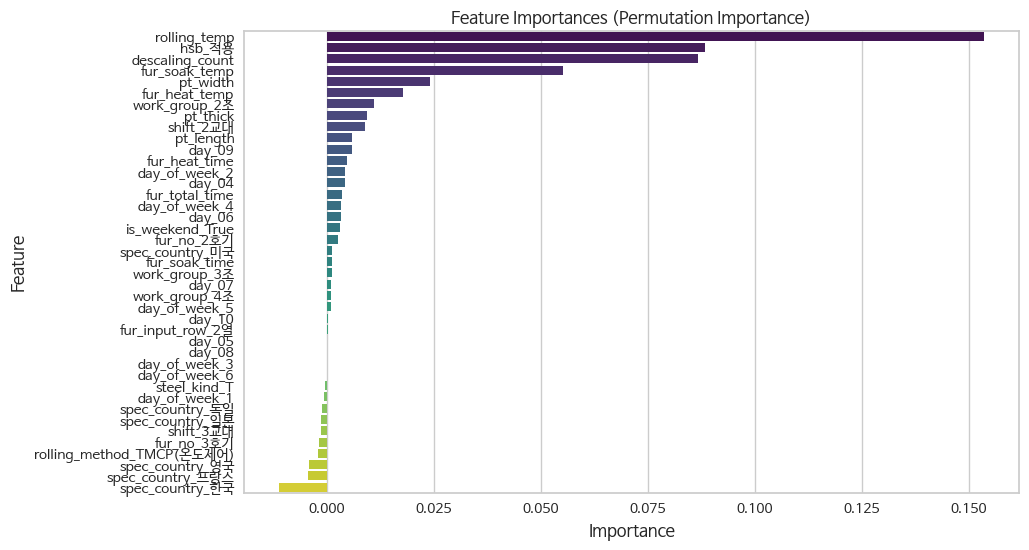

In [15]:
# 모델 훈련
svm_clf.fit(X_train, y_train)

# Permutation Importance 계산
result = permutation_importance(svm_clf, X_test, y_test, n_repeats=10, random_state=42)

# 중요도 데이터프레임 생성
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances (Permutation Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

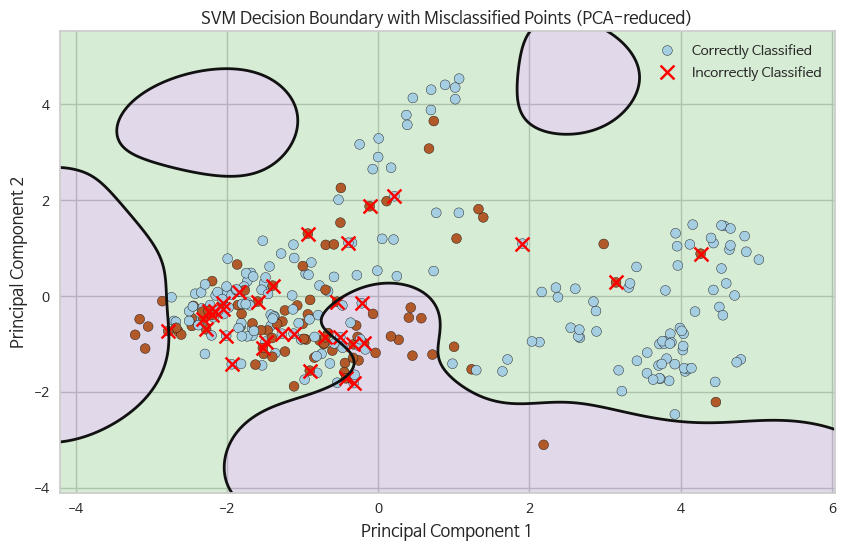

In [16]:
# PCA로 데이터 차원 축소 (2D 시각화를 위한 전처리)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 모델 재훈련 (PCA 축소된 데이터로)
svm_clf_pca = SVC(C=10, gamma='auto', kernel='rbf', random_state=42)
svm_clf_pca.fit(X_train_pca, y_train)

# 결정 경계 시각화
plt.figure(figsize=(10, 6))

# 결정 경계 그리기
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svm_clf_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 결정 경계 및 마진 영역 그리기
plt.contourf(xx, yy, Z > 0, alpha=0.2, cmap=plt.cm.Paired)
plt.contour(xx, yy, Z, colors='k', levels=[0], linewidths=2)

# 데이터 포인트 플로팅
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k', s=50, label='Correctly Classified')

# 오분류된 데이터 포인트 강조 표시
incorrect_preds_pca = pca.transform(incorrect_preds.drop(columns=['Actual', 'Predicted']))
plt.scatter(incorrect_preds_pca[:, 0], incorrect_preds_pca[:, 1], c='red', edgecolor='k', s=100, marker='x', label='Incorrectly Classified')

plt.title('SVM Decision Boundary with Misclassified Points (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [17]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'n_neighbors': [2],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]  # 1은 맨하탄 거리, 2는 유클리드 거리
# }
    
    
# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# print(grid_search.best_params_)

> knn모델은 분류분석을 진행한뒤 개별 피처를 주성분분석하여 2차원 평면에 시각화할 수 있도록 하였습니다. 하지만 2개의 차원으로 축소하는 과정에서 전체 피처의 설명력이 0.25정도로 떨어졌고, 두개의 주성분에 따른 피처의 연관성을 보는 것이 무의미 하다고 판단해 이정도에서 분석을 마무리 하였습니다. 시각화한 내용을 바탕으로 간단하게 분석을 진행해 보자면 우측의 피처에 대해서 전반적으로 양품의 특성이 나타나는 것을 확인할 수 있었고 좌측 하단에서 불량 데이터의 밀도가 높아지는 것으로 보아 주성분과 개별 피처의 연관성을 역으로 추적한다면 유의미한 인사이트를 얻을 수 있을것이라고 생각합니다.

> 시간적 여유가 부족하고 이론적 개념이 부족해 분석을 제대로 마무리하지못했습니다. 앞으로 최종 프로젝트에서는 관련 내용 더욱 학습하여 개선하도록 하겠습니다.

In [18]:
# 모델 생성 및 훈련
knn_clf = KNeighborsClassifier(n_neighbors=2, p=1, weights='uniform')
knn_clf.fit(X_train, y_train)

# 예측
y_pred = knn_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)


Accuracy: 0.83
Confusion Matrix:
[[195  10]
 [ 42  52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       205
           1       0.84      0.55      0.67        94

    accuracy                           0.83       299
   macro avg       0.83      0.75      0.77       299
weighted avg       0.83      0.83      0.81       299

Number of incorrect predictions: 52
Incorrect predictions:
Int64Index([932, 875, 452, 764, 362, 140, 714, 308, 816, 309, 326, 301, 823,
            815, 796, 199, 407, 485, 488, 826, 852, 820, 672, 557, 262, 292,
            673, 269, 289, 548, 295, 480, 825, 790, 453, 873, 142, 914, 666,
            299, 805, 345, 353, 723, 946, 743, 899, 829, 411,   9, 621, 856],
           dtype='int64')


[0.19139862 0.10482887]


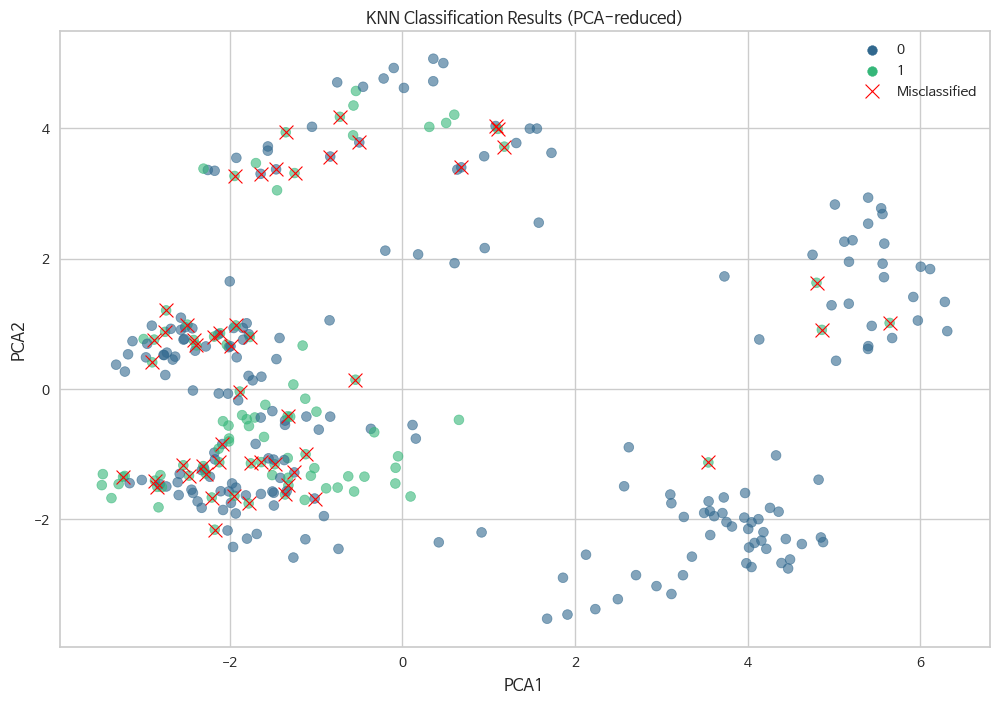

In [19]:
# 데이터 표준화
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# 차원 축소 (PCA)
pca = PCA(n_components=2)  # 2차원으로 축소
X_test_pca = pca.fit_transform(X_test_scaled)
print(pca.explained_variance_ratio_)

# KNN 예측 결과를 DataFrame으로 변환
results_df = pd.DataFrame(X_test_pca, columns=['PCA1', 'PCA2'])
results_df.index = X_test.index  # 원본 X_test의 인덱스를 사용
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred

# 잘못 예측된 샘플의 PCA 결과
incorrect_preds_pca = results_df.loc[incorrect_preds.index]

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=results_df, x='PCA1', y='PCA2', hue='Actual', palette='viridis', marker='o', alpha=0.6, edgecolor=None)
sns.scatterplot(data=incorrect_preds_pca, x='PCA1', y='PCA2', color='red', marker='x', s=100, label='Misclassified')
plt.title('KNN Classification Results (PCA-reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# <span style="color:red"> SVM과 KNN, 회귀모델과 트리기반의 분류 모델이 전처리 과정에 차이가 있어 분석 과정 중에 가설수립과 검정 내용을 추가 하였습니다. 양해 부탁드립니다.</span>

## 카이제곱-work_group에 따른 차이 

- 귀무가설 : work_group과 scale 변수 간에는 연관성이 없다. 즉, work_group에 따라 양품, 불량 비율이 유의미하게 다르지 않다.
- 대립가설 : work_group과 scale 변수 간에는 연관성이 있다. 즉, work_group에 따라 양품과 불량이 비율이 유의미하게 다르다.

<b>1조 - 샘플 크기: 280개<b>
- 양품 비율: 61.07%
- 불량 비율: 38.93%
    
<b>2조 - 샘플 크기: 292개<b>
- 양품 비율: 70.89%
- 불량 비율: 29.11%
    
<b>3조 - 샘플 크기: 218개<b>
- 양품 비율: 69.72%
- 불량 비율: 30.28%
    
<b>4조 - 샘플 크기: 210개<b>
- 양품 비율: 76.19%
- 불량 비율: 23.81%

In [20]:
# 'scale' 변수를 숫자로 변환 (양품 -> 0, 불량 -> 1)
df['scale_numeric'] = df['scale'].apply(lambda x: 1 if x == '불량' else 0)
# 교차표 생성
contingency_table = pd.crosstab(df['work_group'], df['scale_numeric'])
# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
# 결과 출력
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 13.84622170632565
P-value: 0.0031221225267359233
Degrees of freedom: 3
Expected frequencies:
[[193.2   86.8 ]
 [201.48  90.52]
 [150.42  67.58]
 [144.9   65.1 ]]


- 카이제곱 통계량 : 13,85 / p-value : 0.0031 / 자유도 : 3

<b><기대빈도><b>
- 1조: 양품 193.2, 불량 86.8
- 2조: 양품 201.48, 불량 90.52
- 3조: 양품 150.42, 불량 67.58
- 4조: 양품 144.9, 불량 65.1 

    <br>
    
- p-value 값이 0.0031로 매우 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다.
- 즉, work_group 간 scale 변수에 유의미한 차이가 있음을 의미하고 이는 각 work_group이 불량률에 다른 영향을 미칠 수 있다는 결과를 보인다. 

In [21]:
# 데이터 재구성
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
contingency_table_percentage = contingency_table_percentage.rename(columns={0: '양품 비율 (%)', 1: '불량 비율 (%)'})

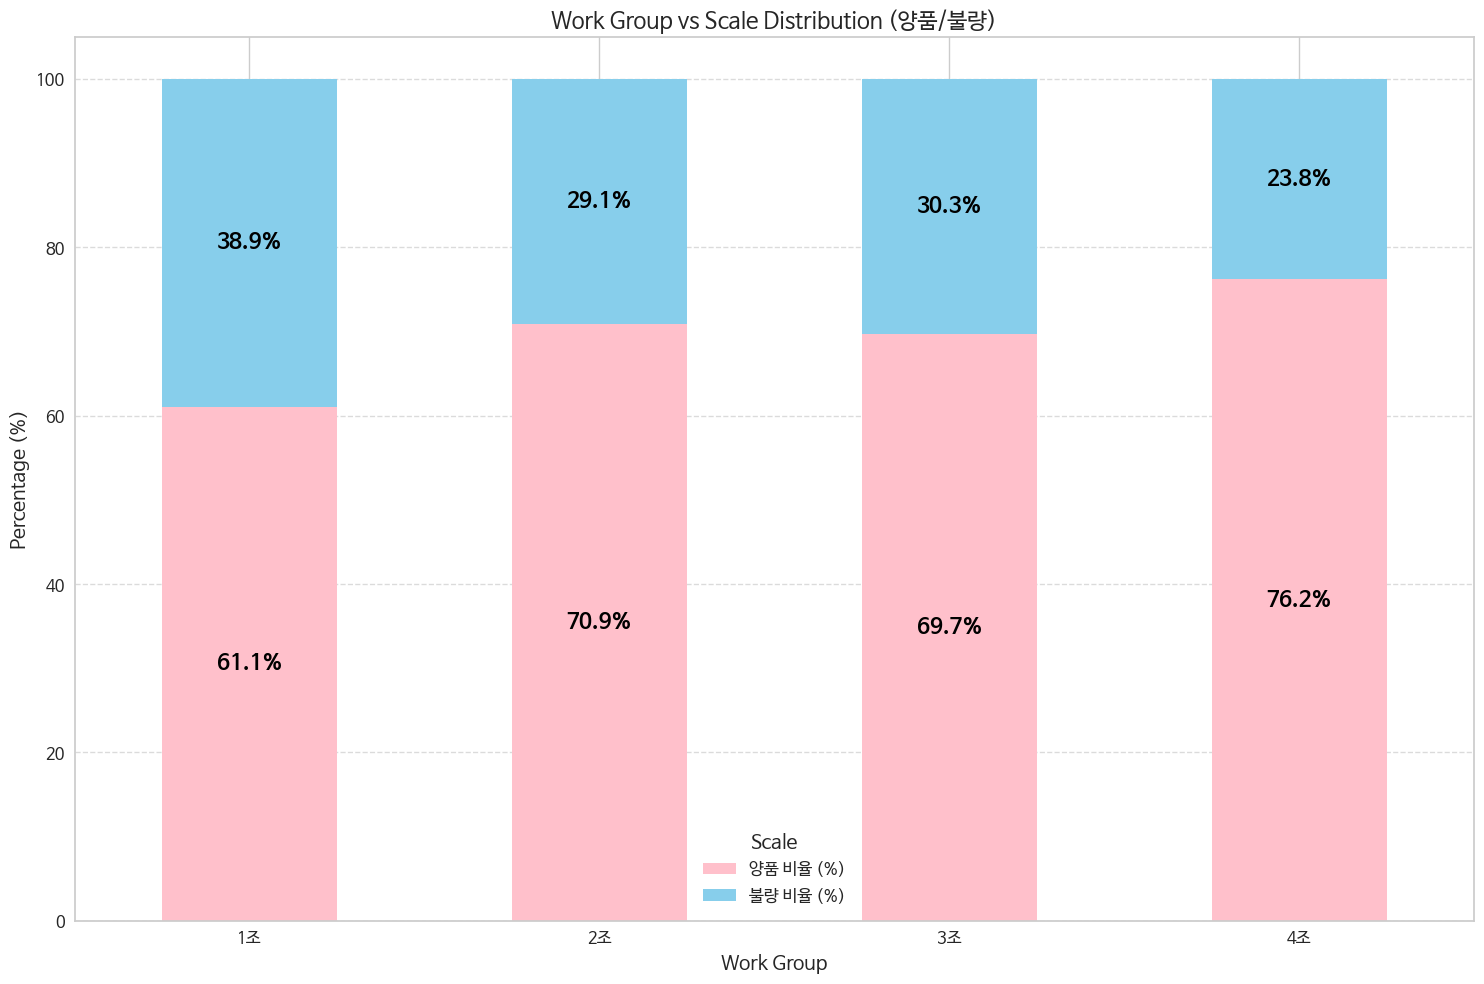

In [22]:
# 막대 그래프 그리기
barplot = contingency_table_percentage.plot(kind='bar', stacked=True, figsize=(15, 10), color=['pink', 'skyblue'])
# 그래프 꾸미기
plt.title('Work Group vs Scale Distribution (양품/불량)', fontsize=16)
plt.xlabel('Work Group', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Scale', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# 각 막대에 퍼센트 수치 표시
for p in barplot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    barplot.text(x + width / 2,
                 y + height / 2,
                 '{:.1f}%'.format(height),
                 ha='center',
                 va='center',
                 fontsize=16,
                 color='black', weight='bold')
plt.tight_layout()
plt.show()

<b> - 분포 형태로 봤을 때, 비교적 4조는 양품 비율이 가장 높고, 1조는 불량 비율이 가장 높음을 알 수 있다. <b>


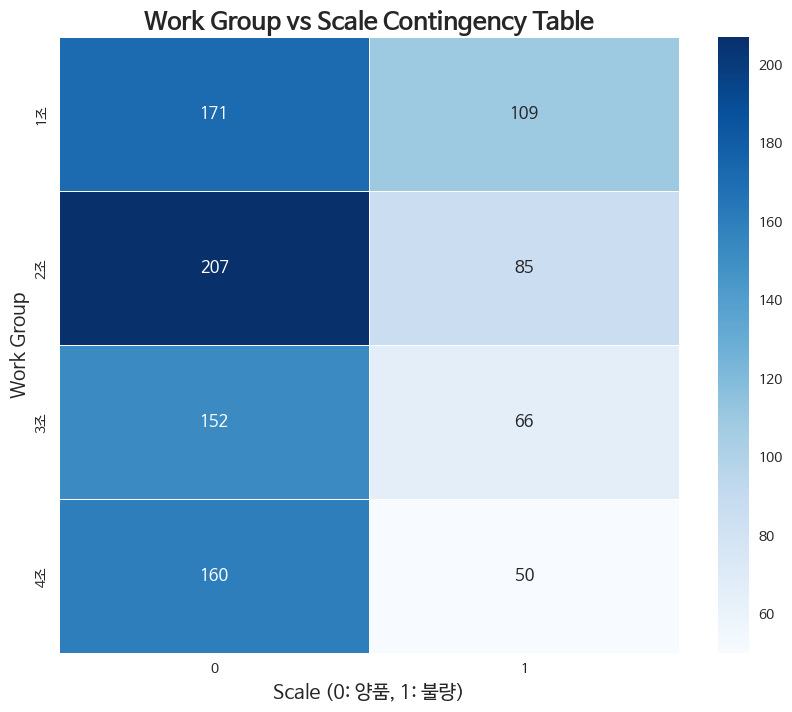

In [23]:
# 교차표 생성
contingency_table = pd.crosstab(df['work_group'], df['scale_numeric'])
# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=True)
# 그래프 제목과 축 레이블 설정
plt.title('Work Group vs Scale Contingency Table', fontsize=18, weight='bold')
plt.xlabel('Scale (0: 양품, 1: 불량)', fontsize=14)
plt.ylabel('Work Group', fontsize=14)
plt.show()

- 1조 : 불량의 수가 양품에 비해 상당히 많다.
- 2조 : 양품의 수가 더 많지만, 불량도 적지 않게 존재한다.
- 3조 : 양품 비율이 높고, 불량의 수가 상대적으로 적다.
- 4조 : 양품의 수가 가장 많고, 불량의 수가 가장 적다.
 > <b> 전반적으로 양품이 불량보다 더 많이 발생하고 있지만, 그룹에 따라 불량의 비율이 다르다. 4조 불량률이 가장 낮고 1조의 불량률이 가장 높은 것을 확인할 수 있다. <b>

=> 각 조의 작업 방식, 품질 관리 프로세스, 작업자 숙련도, 혹은 설비 상태 등이 다를 수 있음을 의미\
=> 각 조 간의 불량률 차이가 크다는 것은 작업 프로세스의 표준화가 부족할 수 있음을 의미\
=> 4조의 베스트 프랙티스를 분석하고 이를 1조 및 다른 조에 적용하면 품질 전반이 향상될 가능성이 있음.

# 비율 계산
## 교대 시간대별로 양품과 불량 비율 계산

In [24]:
# shift_2교대와 shift_3교대를 기반으로 교대 시간대별로 양품 비율 계산

df_1shift = df_x_original[df_x_original['shift_1교대'] == 1]
# 2교대 데이터 필터링
df_2shift = df_x_original[df_x_original['shift_2교대'] == 1]
# 3교대 데이터 필터링
df_3shift = df_x_original[df_x_original['shift_3교대'] == 1]

# 2교대와 3교대의 양품 비율 계산
quality_1shift = df_y_original[df_1shift.index].value_counts(normalize=True)
quality_2shift = df_y_original[df_2shift.index].value_counts(normalize=True)
quality_3shift = df_y_original[df_3shift.index].value_counts(normalize=True)

# 결과를 DataFrame으로 통합
shift_quality = pd.DataFrame({
    '1교대': quality_1shift,
    '2교대': quality_2shift,
    '3교대': quality_3shift
}).T

# 결과 출력
print("교대 시간대별 양품 비율 (1교대, 2교대, 3교대):")
print(shift_quality)

교대 시간대별 양품 비율 (1교대, 2교대, 3교대):
            0         1
1교대  0.608150  0.391850
2교대  0.762048  0.237952
3교대  0.690962  0.309038


<Figure size 1500x1000 with 0 Axes>

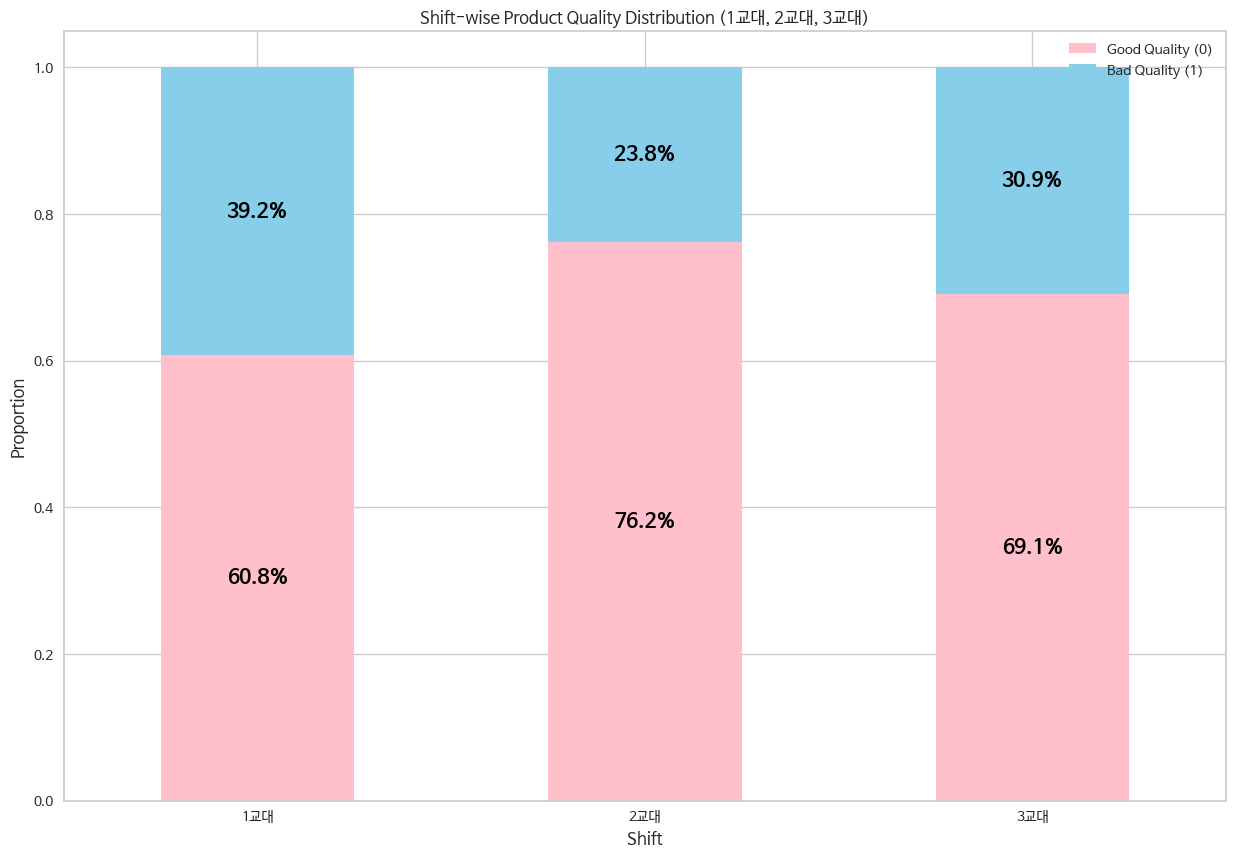

In [25]:
# 교대 시간대별 양품 비율을 시각화
plt.figure(figsize=(15, 10))
ax = shift_quality.plot(kind='bar', stacked=True, color=['pink', 'skyblue'], figsize=(15, 10))
plt.title("Shift-wise Product Quality Distribution (1교대, 2교대, 3교대)")
plt.xlabel("Shift")
plt.ylabel("Proportion")
plt.legend(["Good Quality (0)", "Bad Quality (1)"], loc="upper right")
plt.xticks(rotation=0)

# 막대 위에 퍼센트 표시
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height * 100:.1f}%', (x + width/2, y + height/2),
                ha='center', va='center', fontsize=15, color='black', fontweight='bold')

plt.show()

# 카이제곱 검정
## 교대 시간대별로 양품과 불량 사이 독립성 검정

### 교대 시간
1교대 -> 06:00 ~ 14:00\
2교대 -> 14:00 ~ 22:00\
3교대 -> 22:00 ~ 06:00

In [26]:
# 교대 시간대별 데이터 필터링
df_1shift = df_x_original[df_x_original['shift_1교대'] == 1]
df_2shift = df_x_original[df_x_original['shift_2교대'] == 1]
df_3shift = df_x_original[df_x_original['shift_3교대'] == 1]

# 교대 시간대별 품질 (양품/불량) 빈도 계산
contingency_table = pd.DataFrame({
    '1교대': df_y_original[df_1shift.index].value_counts(),
    '2교대': df_y_original[df_2shift.index].value_counts(),
    '3교대': df_y_original[df_3shift.index].value_counts()
}).T

# 결측치 처리 (양품/불량 데이터가 없는 경우를 대비)
contingency_table = contingency_table.fillna(0)

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 카이제곱 검정 결과 출력
print("카이제곱 검정 결과")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

카이제곱 검정 결과
Chi2: 17.9738351961109
P-value: 0.00012503490769909785
Degrees of Freedom: 2
Expected Frequencies:
[[219.51307847  99.48692153]
 [228.45875252 103.54124748]
 [236.02816901 106.97183099]]


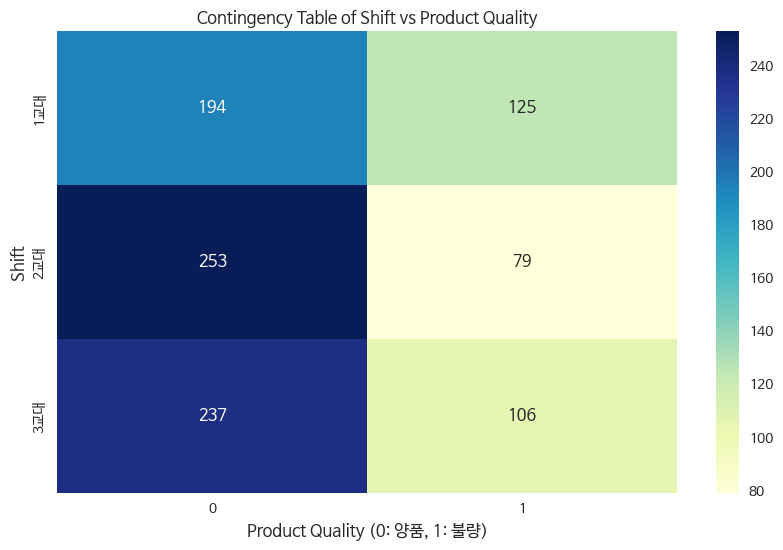

In [27]:
# 교차표 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Contingency Table of Shift vs Product Quality")
plt.xlabel("Product Quality (0: 양품, 1: 불량)")
plt.ylabel("Shift")
plt.show()

1교대는 양품 194건, 불량 125건 -> 불량률이 상대적으로 높다.\
2교대는 양품 253건, 불량 79건 -> 다른 교대에 비해 양품 비율이 높고 불량률이 낮다.\
3교대는 양품 237건, 불량 106건 -> 1교대와 비교했을 때 양품 비율은 높지만, 2교대보다는 불량률이 높다.

=> 2교대는 다른 교대에 비해 양품 비율이 가장 높고 불량률이 가장 낮은 반면, 1교대는 불량률이 상대적으로 높은 것으로 보인다. 

<br>

=> 1 : 아침 시간대의 작업 피로, 기계 셋업, 혹은 초기 생산 단계에서 품질 관리 이슈 등이 영향을 미쳤을 가능성이 있음.\
=> 2 : 이 시간대 작업자들이 가장 활발하게 일하고, 기계나 설비 상태가 안정적인 상태에 있을 가능성이 높기 때문에 품질 관리가 잘 이루어지고 있다고 볼 수 있음.\
=> 3 : 야간 작업 특성상 작업자 피로도 증가, 야간 작업 환경의 특성 등으로 인해 불량률이 2교대보다는 증가했을 가능성이 있음.

In [28]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_x_original, df_y_original, test_size=0.3, random_state=42)

In [29]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [5 * i for i in range(20)],
#     'min_samples_split': [10 * i for i in range(10)],
#     'min_samples_leaf': [5 * i for i in range(5)]
# }

# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")

> 의사결정트리같은 경우, 최대깊이가 10정도로 깊게 나왔기 때문에 과대적합되었다고 생각합니다. 오분류 컴포넌트의 개수가 2개정도로 과대적합 되었다고 생각되기때문에 최종모델에서 제외하겠습니다.

Accuracy: 0.99
Confusion Matrix:
[[204   1]
 [  1  93]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       0.99      0.99      0.99        94

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299

Number of incorrect predictions: 2
Incorrect predictions:
Int64Index([714, 9], dtype='int64')
     pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
714        40      2500      23200           1158            129   
9          38      3100      16200           1135            119   

     fur_soak_temp  fur_soak_time  fur_total_time  rolling_temp  \
714           1148             76             305           995   
9             1124             73             290           881   

     descaling_count  ...  day_of_week_4  day_of_week_5  day_of_week_6  \
714                

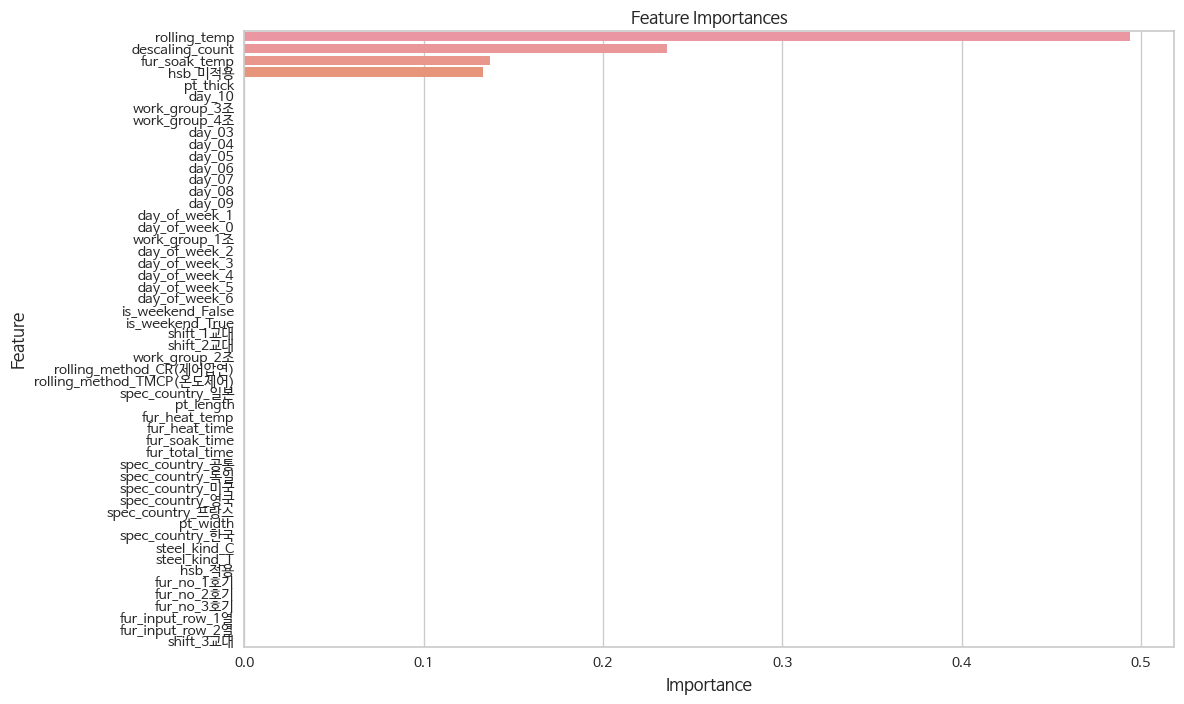

In [30]:
# 최적의 하이퍼파라미터로 모델 생성
best_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 5, min_samples_split = 10)

# 모델 훈련
best_clf.fit(X_train, y_train)

# 예측
y_pred = best_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)
print(incorrect_preds)

# 피처 중요도 추출
feature_importances = best_clf.feature_importances_
feature_names = X_train.columns  # X_train이 DataFrame인 경우
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

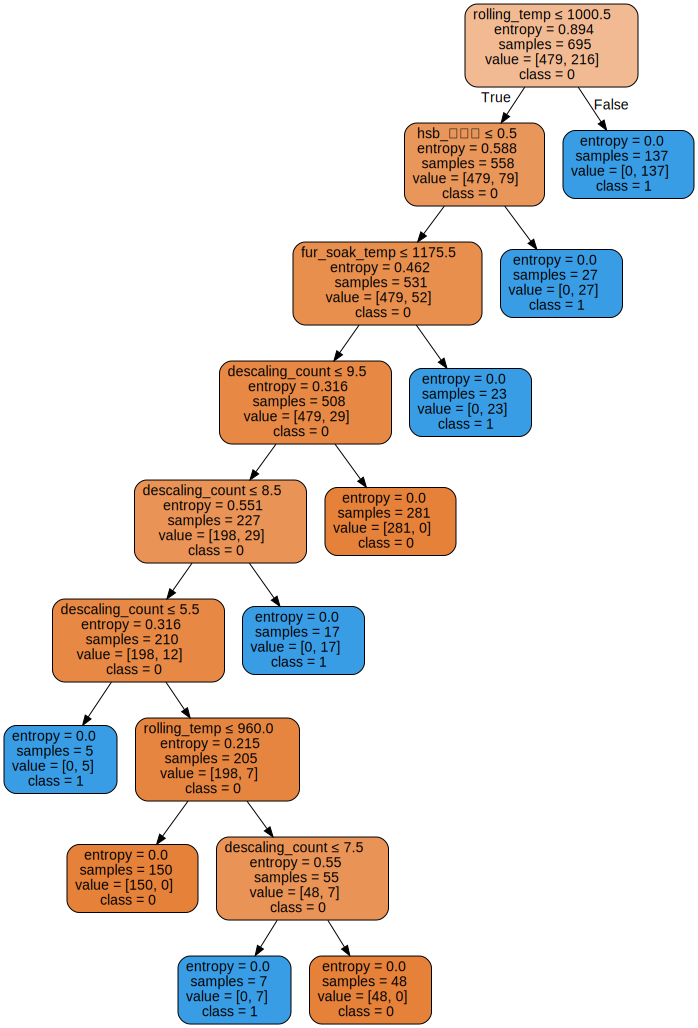

In [31]:
# 의사결정트리 시각화
dot_data = export_graphviz(
    best_clf,
    feature_names=X_train.columns,
    class_names=best_clf.classes_.astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)

# 그래프를 직접 시각화 (Jupyter Notebook 내에서)
graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='png')  # PNG 파일로 저장
graph  # 노트북에서 직접 시각화

In [32]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [5 * i for i in range(20)],
#     'min_samples_split': [10 * i for i in range(10)],
#     'min_samples_leaf': [5 * i for i in range(5)],
#     'bootstrap': [True, False]
# }

# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")


> 랜덤포레스트 모델의 경우, 여러개의 트리를 생성하여 부트스트랩 방식을 써서 모델을 학습시킵니다. 현재 트리기반의 다른 모델들에서 모든 성능이 과대적합으로 나오는 상황에서 부트스트랩 방식을 이용하여 과적합을 제일 방지시켜 일반하된 성능을 나타낸다고 판단하였기 때문에 최종 모델은 랜덤포렛트로 선정하였습니다.

Accuracy: 0.95
Confusion Matrix:
[[201   4]
 [ 10  84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       205
           1       0.95      0.89      0.92        94

    accuracy                           0.95       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.95      0.95       299

Number of incorrect predictions: 14
Incorrect predictions:
Int64Index([875, 308, 816, 326, 815, 485, 557, 292, 269, 299, 727, 353, 946,
            9],
           dtype='int64')
     pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
875        13      2700      53700           1170             78   
308        21      2800      44900           1146             64   
816        20      2200      38000           1172             61   
326        18      3100      41800           1115             58   
815        20      2200      38000           1174             62   
485     

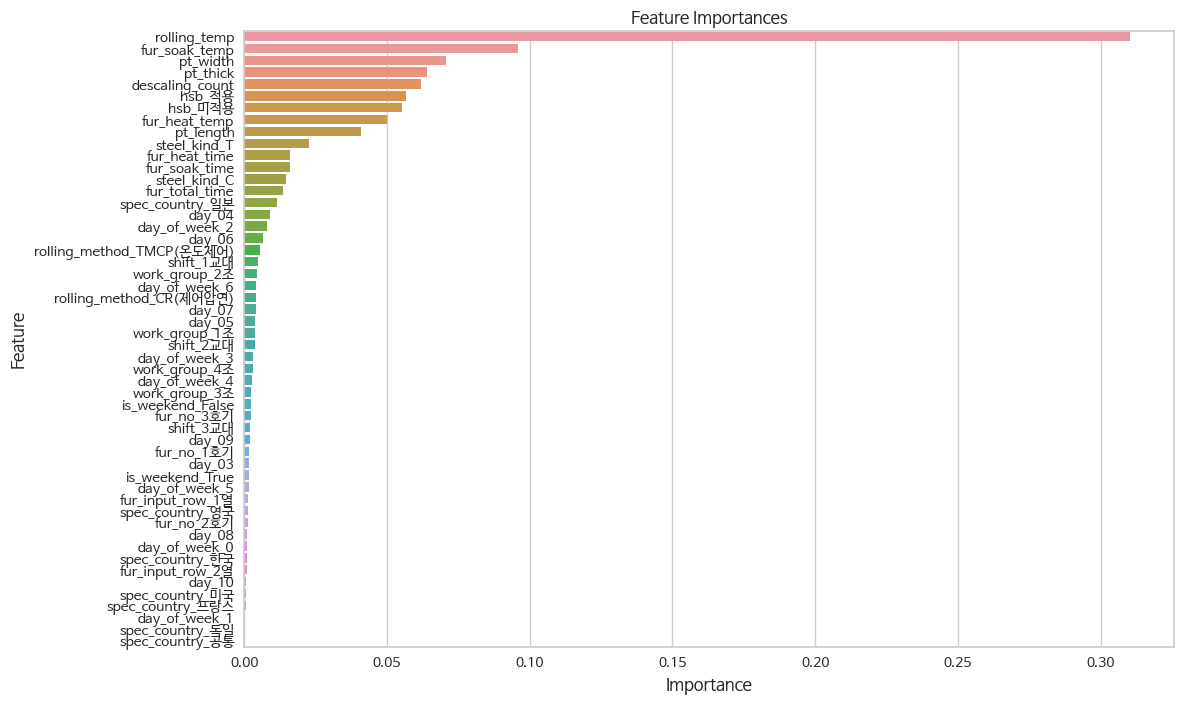

In [33]:
# 모델 생성 및 훈련
rf_clf = RandomForestClassifier(bootstrap = False, max_depth = 15, min_samples_leaf = 5, min_samples_split = 20, \
                                n_estimators = 50, random_state=42)
rf_clf.fit(X_train, y_train)

# 예측
y_pred = rf_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)
print(incorrect_preds)

# 피처 중요도 추출
feature_importances = rf_clf.feature_importances_
feature_names = X_train.columns  # X_train이 DataFrame인 경우
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

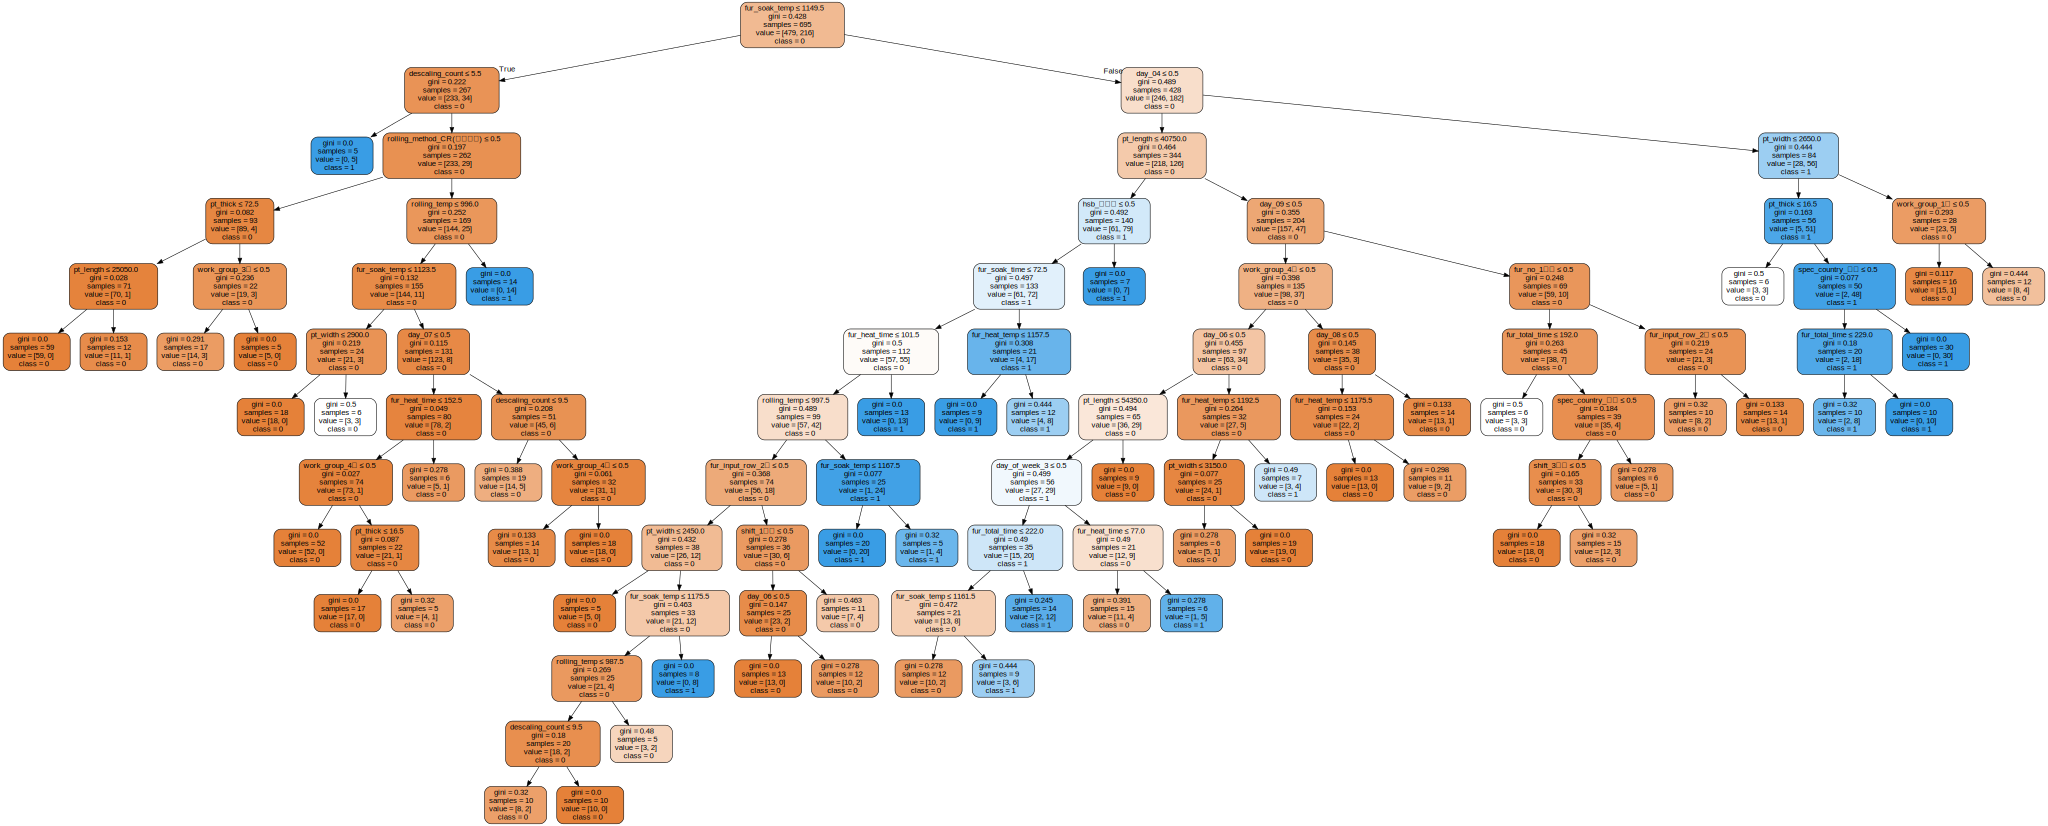

In [34]:
# 첫 번째 결정 트리 시각화
dot_data = export_graphviz(rf_clf.estimators_[0], feature_names=X_train.columns, class_names=rf_clf.classes_.astype(str), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('random_forest_tree', format='png')
graph

In [35]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.2],
#     'max_depth': [5 * i for i in range(20)],
#     'min_samples_split': [10 * i for i in range(10)],
#     'min_samples_leaf': [5 * i for i in range(5)]
# }

# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")

> GB모델의 경우 n_estimators가 작을수록, 최대 깊이가 작을수록 과대적합을 해소할 수 있다고 판단하여 과적합을 방지하고자 했습니다. 하지만, 이번 결과도 마찬가지로 오분류 데이터 수가 4개로 과대적합 되었고, 조금 더 일반적으로 사용할 수 있는 모델이 더 적합하다고 판단해 최종 모델 선정에서 제외 하였습니다. 

Accuracy: 0.99
Confusion Matrix:
[[205   0]
 [  4  90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       205
           1       1.00      0.96      0.98        94

    accuracy                           0.99       299
   macro avg       0.99      0.98      0.98       299
weighted avg       0.99      0.99      0.99       299

Number of incorrect predictions: 4
Incorrect predictions:
Int64Index([308, 557, 263, 9], dtype='int64')
     pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
308        21      2800      44900           1146             64   
557        40      2300      25500           1161            105   
263        20      2200      42400           1155             95   
9          38      3100      16200           1135            119   

     fur_soak_temp  fur_soak_time  fur_total_time  rolling_temp  \
308           1151             62             223           971   
557           1

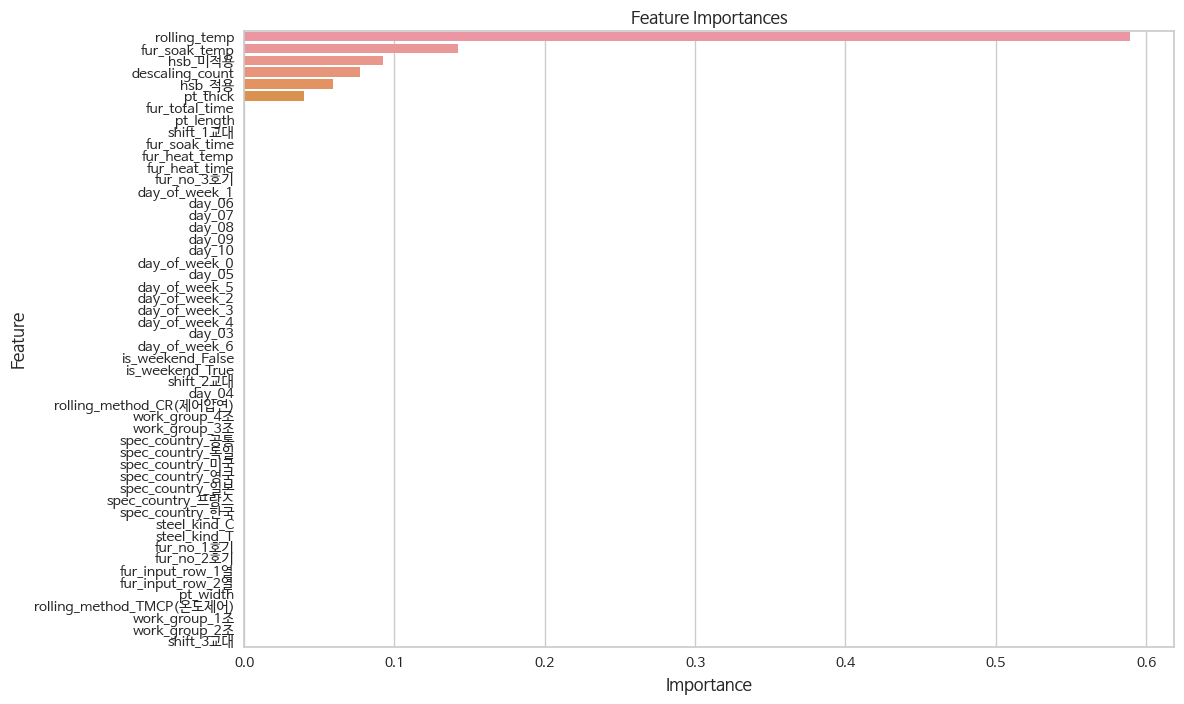

In [36]:
# 모델 생성 및 훈련
gb_clf = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, min_samples_leaf = 10, min_samples_split = 10,\
                                    n_estimators = 5, random_state=42)
gb_clf.fit(X_train, y_train)

# 예측
y_pred = gb_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)
print(incorrect_preds)

# 피처 중요도 추출
feature_importances = gb_clf.feature_importances_
feature_names = X_train.columns  # X_train이 DataFrame인 경우
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [37]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.2],
#     'max_depth': [5 * i for i in range(20)],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")

> XGBoost 모델 또한 오분류 데이터가 2개로 과대적합 된 것을 알 수 있는데 조금 더 일반적으로 사용할 수 있는 모델이 더 적합하다고 판단해 최종 모델 선정에서 제외 하였습니다. 최대 깊이를 줄어거나 학습률을 조정하는 등의 개선이 필요하다고 생각합니다.

Accuracy: 0.99
Confusion Matrix:
[[205   0]
 [  2  92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       205
           1       1.00      0.98      0.99        94

    accuracy                           0.99       299
   macro avg       1.00      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299

Number of incorrect predictions: 2
Incorrect predictions:
Int64Index([557, 9], dtype='int64')
     pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
557        40      2300      25500           1161            105   
9          38      3100      16200           1135            119   

     fur_soak_temp  fur_soak_time  fur_total_time  rolling_temp  \
557           1125            122             293           820   
9             1124             73             290           881   

     descaling_count  ...  day_of_week_4  day_of_week_5  day_of_week_6  \
557                

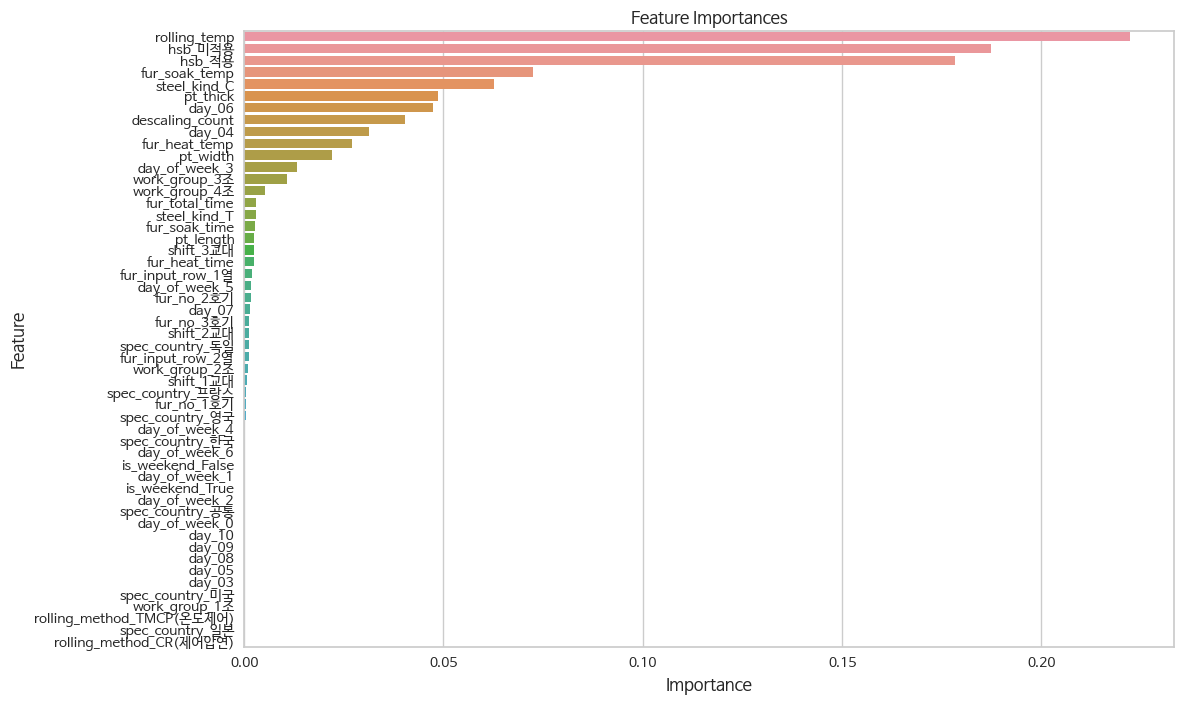

In [38]:
# XGBoost 모델 생성 및 훈련
xgb_model = xgb.XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 5, min_child_weight = 1, \
                              n_estimators = 200, subsample = 1.0, random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)
print(incorrect_preds)

# 피처 중요도 추출
feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns  # X_train이 DataFrame인 경우
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [39]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.2],
#     'max_depth': [5 * i for i in range(20)],
#     'num_leaves': [31, 63, 127],
#     'min_child_samples': [20, 30, 40],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=LGBMClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")

> Lightgbm 모델의 경우 대용량 데이터에 적합하고 비교적 소규모의 데이터에 과적합 될 수 있는 우려가 있습니다. 결과도 마찬가지로 오분류 데이터 수가 2개로 과대적합 된 것을 알 수 있는데 조금 더 일반적으로 사용할 수 있는 모델이 더 적합하다고 판단해 최종 모델 선정에서 제외 하였습니다. 


Accuracy: 0.99
Confusion Matrix:
[[204   1]
 [  1  93]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       0.99      0.99      0.99        94

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299

Number of incorrect predictions: 2
Incorrect predictions:
Int64Index([714, 9], dtype='int64')
     pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
714        40      2500      23200           1158            129   
9          38      3100      16200           1135            119   

     fur_soak_temp  fur_soak_time  fur_total_time  rolling_temp  \
714           1148             76             305           995   
9             1124             73             290           881   

     descaling_count  ...  day_of_week_4  day_of_week_5  day_of_week_6  \
714                

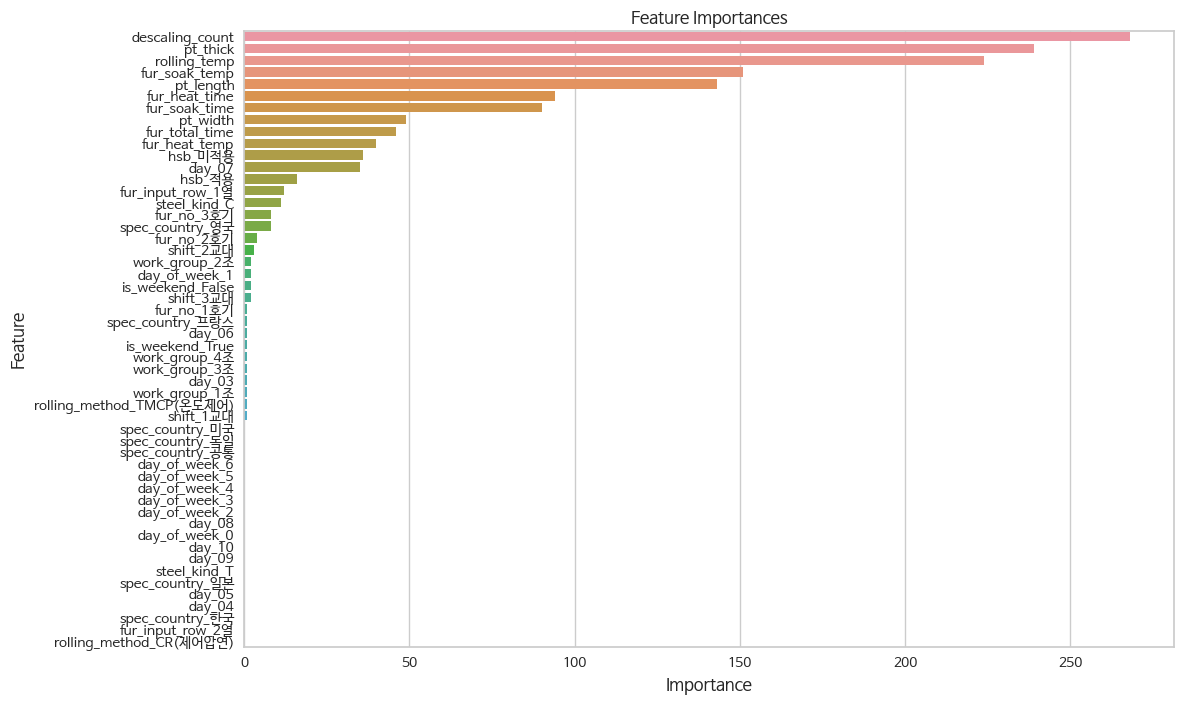

In [40]:
# LightGBM 모델 생성 및 훈련
lgb_clf = LGBMClassifier(colsample_bytree = 1.0, learning_rate = 0.2, max_depth = 10, min_child_samples = 20, \
                         n_estimators = 200, num_leaves = 31, subsample = 0.8, random_state=42)
lgb_clf.fit(X_train, y_train)

# 예측
y_pred = lgb_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)
print(incorrect_preds)

# 피처 중요도 추출
feature_importances = lgb_clf.feature_importances_
feature_names = X_train.columns  # X_train이 DataFrame인 경우
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()